In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
# from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances

# from umap import UMAP
# from seaborn import kdeplot
# from scipy.stats import gaussian_kde


# Load data
freq = np.load("Data/frequencies.npy")
shifted_signals = np.load("Data/Processed/shifted_signals.npy")
shifted_signals /= np.max(shifted_signals, keepdims=True, axis=1)

threshold_signals = np.load("Data/Processed/threshold_signals.npy")
threshold_signals /= np.max(threshold_signals, keepdims=True, axis=1)

subtraction_signals = np.load("Data/Processed/subtraction_signals.npy")
subtraction_signals /= np.max(subtraction_signals, keepdims=True, axis=1)

In [ ]:
from src.models.kmeans import CustomKMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
silhouette = []
for i, signals in enumerate([shifted_signals, threshold_signals, subtraction_signals]):
    s_score = []
    for j in tqdm(range(2, 10)):
        euclidean_model = KMeans(n_clusters=j, random_state=42).fit(signals)
        cosine_model = CustomKMeans(n_clusters=j, random_state=42, distance_metric="cosine").fit(signals)

        s_score.append([silhouette_score(signals, euclidean_model.labels_, metric="euclidean"), silhouette_score(signals, euclidean_model.labels_, metric="cosine"), silhouette_score(signals, cosine_model.labels_, metric="euclidean"), silhouette_score(signals, cosine_model.labels_, metric="cosine")])
    silhouette.append(s_score)

100%|██████████| 8/8 [09:24<00:00, 70.50s/it]


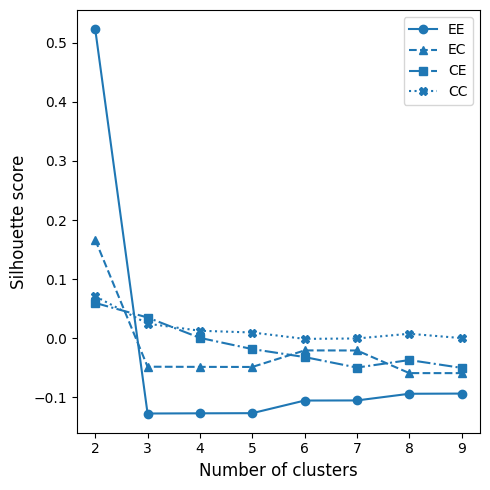

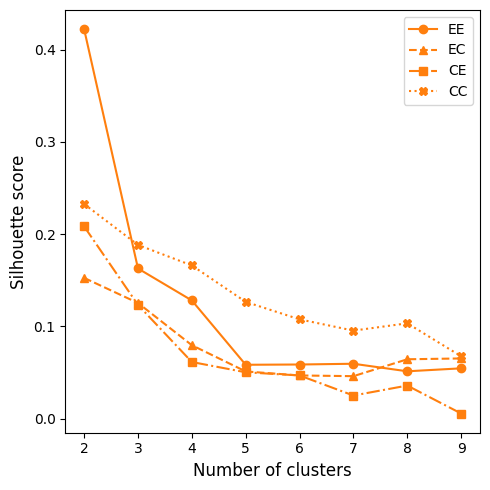

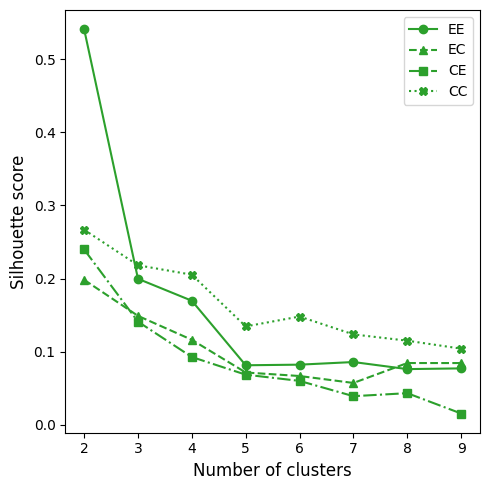

In [ ]:
silhouette = np.array(silhouette)
for i in range(3):
    plt.figure(figsize=(5, 5))
    clr = plt.get_cmap("tab10").colors[i]
    for j in range(4):
        marker = ['o', '^', 's', 'X'][j]
        style = ['-', '--', '-.', ':'][j]
        plt.plot(range(2, 10), silhouette[i][:, j], marker=marker, color=clr, linestyle=style)
    plt.legend(["EE", "EC", "CE", "CC"])
    plt.xlabel("Number of clusters", fontsize=12)
    plt.ylabel("Silhouette score", fontsize=12)
    plt.tight_layout()
    plt.show()

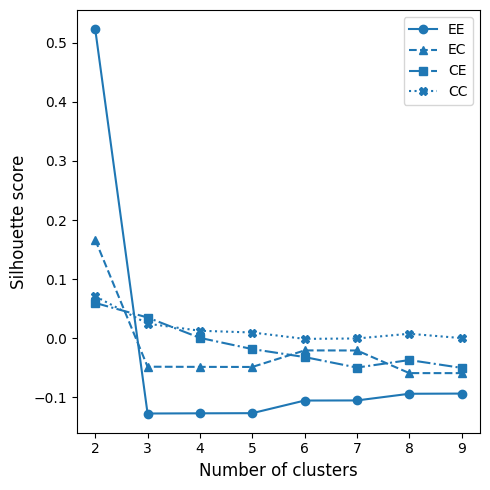

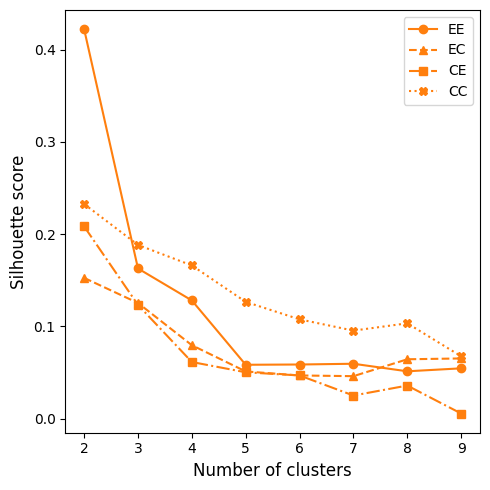

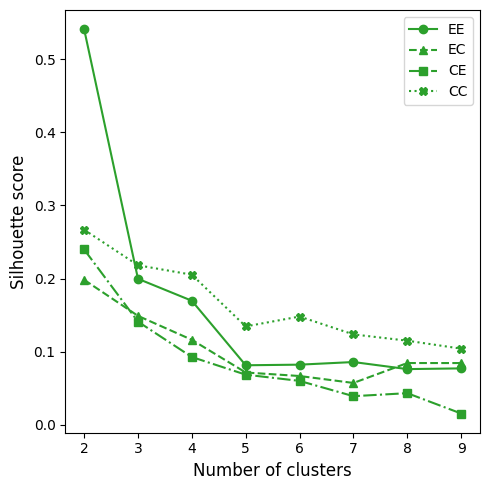

In [ ]:
silhouette = np.array(silhouette)
for i in range(3):
    plt.figure(figsize=(5, 5))
    clr = plt.get_cmap("tab10").colors[i]
    for j in range(4):
        marker = ['o', '^', 's', 'X'][j]
        style = ['-', '--', '-.', ':'][j]
        plt.plot(range(2, 10), silhouette[i][:, j], marker=marker, color=clr, linestyle=style)
    plt.legend(["EE", "EC", "CE", "CC"])
    plt.xlabel("Number of clusters", fontsize=12)
    plt.ylabel("Silhouette score", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"results/kmeans/distance_metric_silhouette_score_{['raw', 'threshold', 'subtraction'][i]}.pdf")
    plt.show()